<a href="https://colab.research.google.com/github/Sripsri/Elevate_labs/blob/main/Srilatha__AnjuFurniture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/Invact-Abhay/DOE/refs/heads/main/SalesReturnTable.csv")


In [3]:
data.head(10)

,TransactionID,ProductName,Reason,Price/Unit,SalesValue,Returns
0,3627,Dining Tables,Wrong Size,30000,30000,1
1,3628,Bed Frames,Damage or Defect,20000,40000,2
2,3629,Bed Frames,Wrong Size,20000,20000,1
3,3630,Bed Frames,Damage or Defect,20000,40000,2
4,3631,Dressers,Wrong Size,18000,18000,1
5,3632,Sofas and Couches,Late Delivery,50000,50000,1
6,3633,Coffee Tables,Damage or Defect,10000,10000,1
7,3634,Coffee Tables,Change of Mind,10000,10000,1
8,3635,Mattresses,Poor Quality,12000,12000,1
9,3636,Dressers,Poor Quality,18000,36000,2


In [4]:
data.tail()

,TransactionID,ProductName,Reason,Price/Unit,SalesValue,Returns
1467,5094,Bed Frames,Damage or Defect,20000,20000,1
1468,5095,Dining Tables,Wrong Size,30000,60000,2
1469,5096,Bed Frames,Damage or Defect,20000,20000,1
1470,5097,Dining Tables,Wrong Size,30000,60000,2
1471,5098,Bed Frames,Damage or Defect,20000,20000,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  1472 non-null   int64 
 1   ProductName    1472 non-null   object
 2   Reason         1472 non-null   object
 3   Price/Unit     1472 non-null   int64 
 4   SalesValue     1472 non-null   int64 
 5   Returns        1472 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 69.1+ KB


In [6]:
data.describe()

,TransactionID,Price/Unit,SalesValue,Returns
count,1472.000000,1472.000000,1472.000000,1472.000000
mean,4362.500000,22719.429348,34815.217391,1.506114
std,425.074111,11741.468526,22988.599118,0.500133
min,3627.000000,5000.000000,5000.000000,1.000000
25%,3994.750000,12000.000000,20000.000000,1.000000
50%,4362.500000,20000.000000,25000.000000,2.000000
75%,4730.250000,30000.000000,50000.000000,2.000000
max,5098.000000,50000.000000,100000.000000,2.000000


In [11]:
data[data.duplicated()].sum()

,0
TransactionID,0
ProductName,0
Reason,0
Price/Unit,0
SalesValue,0
Returns,0


In [14]:
total_returns=data.groupby("ProductName")["Returns"].sum()
total_returns

,Returns
ProductName,
Bed Frames,406
Bookcases,72
Coffee Tables,168
Desks,43
Dining Chairs,129
Dining Tables,603
Dressers,90
Mattresses,123
Nightstands,61


In [15]:
sorted_returns=total_returns.sort_values(ascending=False)
sorted_returns

,Returns
ProductName,
Dining Tables,603
Bed Frames,406
Sofas and Couches,187
Recliners,182
Coffee Tables,168
Dining Chairs,129
Mattresses,123
Wardrobes,93
Dressers,90


In [16]:
cumulative_sum=sorted_returns.cumsum()
cumulative_sum

,Returns
ProductName,
Dining Tables,603
Bed Frames,1009
Sofas and Couches,1196
Recliners,1378
Coffee Tables,1546
Dining Chairs,1675
Mattresses,1798
Wardrobes,1891
Dressers,1981


In [17]:
cumulative_percentage=round(cumulative_sum/sorted_returns.sum()*100,2)
cumulative_percentage

,Returns
ProductName,
Dining Tables,27.20
Bed Frames,45.51
Sofas and Couches,53.95
Recliners,62.16
Coffee Tables,69.73
Dining Chairs,75.55
Mattresses,81.10
Wardrobes,85.30
Dressers,89.35


Text(0.5, 1.0, 'Pareto Analysis of Product Return')

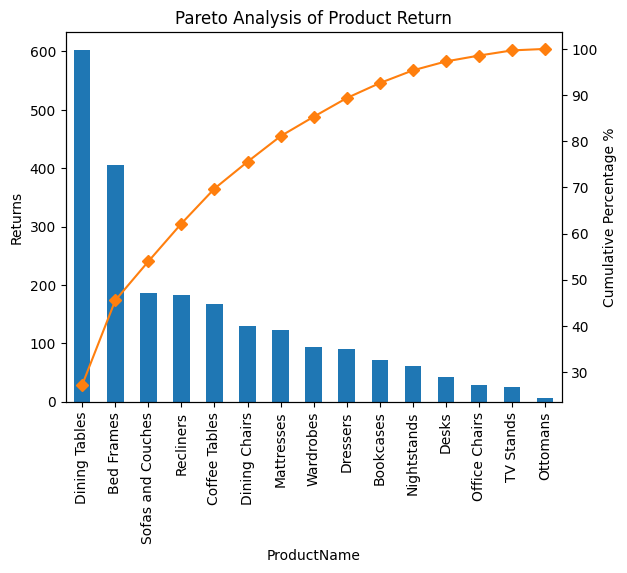

In [18]:
fig, ax1= plt.subplots()
sorted_returns.plot(kind='bar',color='C0',ax=ax1)
ax1.set_ylabel('Returns')

ax2 = ax1.twinx()
cumulative_percentage.plot(kind='line',color='C1',ax=ax2,marker='D')
ax2.set_ylabel('Cumulative Percentage %')
plt.title('Pareto Analysis of Product Return')


In [19]:
data.head()

,TransactionID,ProductName,Reason,Price/Unit,SalesValue,Returns
0,3627,Dining Tables,Wrong Size,30000,30000,1
1,3628,Bed Frames,Damage or Defect,20000,40000,2
2,3629,Bed Frames,Wrong Size,20000,20000,1
3,3630,Bed Frames,Damage or Defect,20000,40000,2
4,3631,Dressers,Wrong Size,18000,18000,1


In [20]:
data.columns

Index(['TransactionID', 'ProductName', 'Reason', 'Price/Unit', 'SalesValue',
       'Returns'],
      dtype='object')

In [22]:
Top4=data.query('ProductName in ["Dining Tables","Bed Frames","Sofas and Couches","Recliners"]')
Top4

,TransactionID,ProductName,Reason,Price/Unit,SalesValue,Returns
0,3627,Dining Tables,Wrong Size,30000,30000,1
1,3628,Bed Frames,Damage or Defect,20000,40000,2
2,3629,Bed Frames,Wrong Size,20000,20000,1
3,3630,Bed Frames,Damage or Defect,20000,40000,2
5,3632,Sofas and Couches,Late Delivery,50000,50000,1
...,...,...,...,...,...,...
1467,5094,Bed Frames,Damage or Defect,20000,20000,1
1468,5095,Dining Tables,Wrong Size,30000,60000,2
1469,5096,Bed Frames,Damage or Defect,20000,20000,1
1470,5097,Dining Tables,Wrong Size,30000,60000,2


In [23]:
sorted_reasons1=Top4.groupby("Reason")["Returns"].sum().sort_values(ascending=False)
sorted_reasons1

,Returns
Reason,
Wrong Size,612
Damage or Defect,480
Comfort Issues,74
Assembly Issues,56
Poor Quality,55
Color/Style Mismatch,45
Late Delivery,34
Change of Mind,22


In [24]:
cumulative_reason_percentage=round(sorted_reasons1.cumsum()/sorted_reasons1.sum()*100,2)
cumulative_reason_percentage

,Returns
Reason,
Wrong Size,44.41
Damage or Defect,79.25
Comfort Issues,84.62
Assembly Issues,88.68
Poor Quality,92.67
Color/Style Mismatch,95.94
Late Delivery,98.40
Change of Mind,100.00


Text(0.5, 1.0, 'Pareto analysis of the reasons associated with returns')

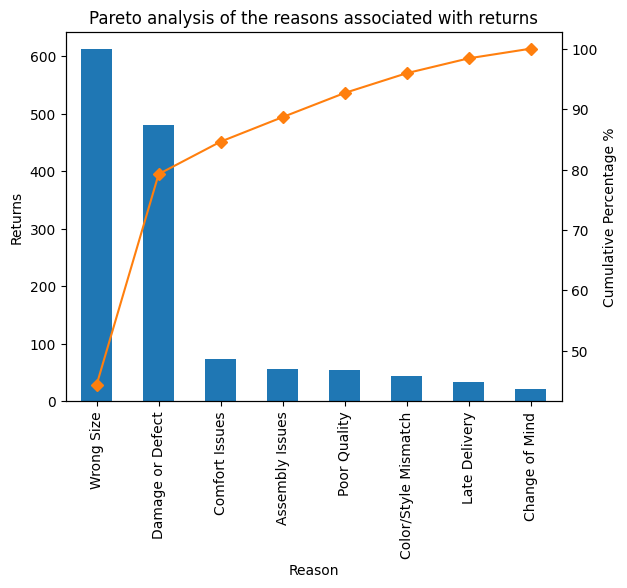

In [25]:
fig, ax1= plt.subplots()
sorted_reasons1.plot(kind='bar',color='C0',ax=ax1)
ax1.set_ylabel('Returns')
ax2=ax1.twinx()
cumulative_reason_percentage.plot(kind='line',color='C1',ax=ax2,marker='D')
ax2.set_ylabel('Cumulative Percentage %')
plt.title('Pareto analysis of the reasons associated with returns')